In [2]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib import cm

plt.style.use(['science','ieee', "no-latex", "std-colors"])



In [3]:
df1 = pd.read_csv("../test-neighbours2.csv")
frames = set(df1["frame"])
keys = []
for i, axis in enumerate(["x", "y", "z", "q"]):
    for c in range(24):
        keys.append(f"{axis}_c{c}")
        
keys.extend(["a1", "a2", "d1", "error", "energy"])
avgs = df1.groupby('frame', as_index=False)[keys].mean()
# avgs = df1
avgs = avgs.drop(0)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


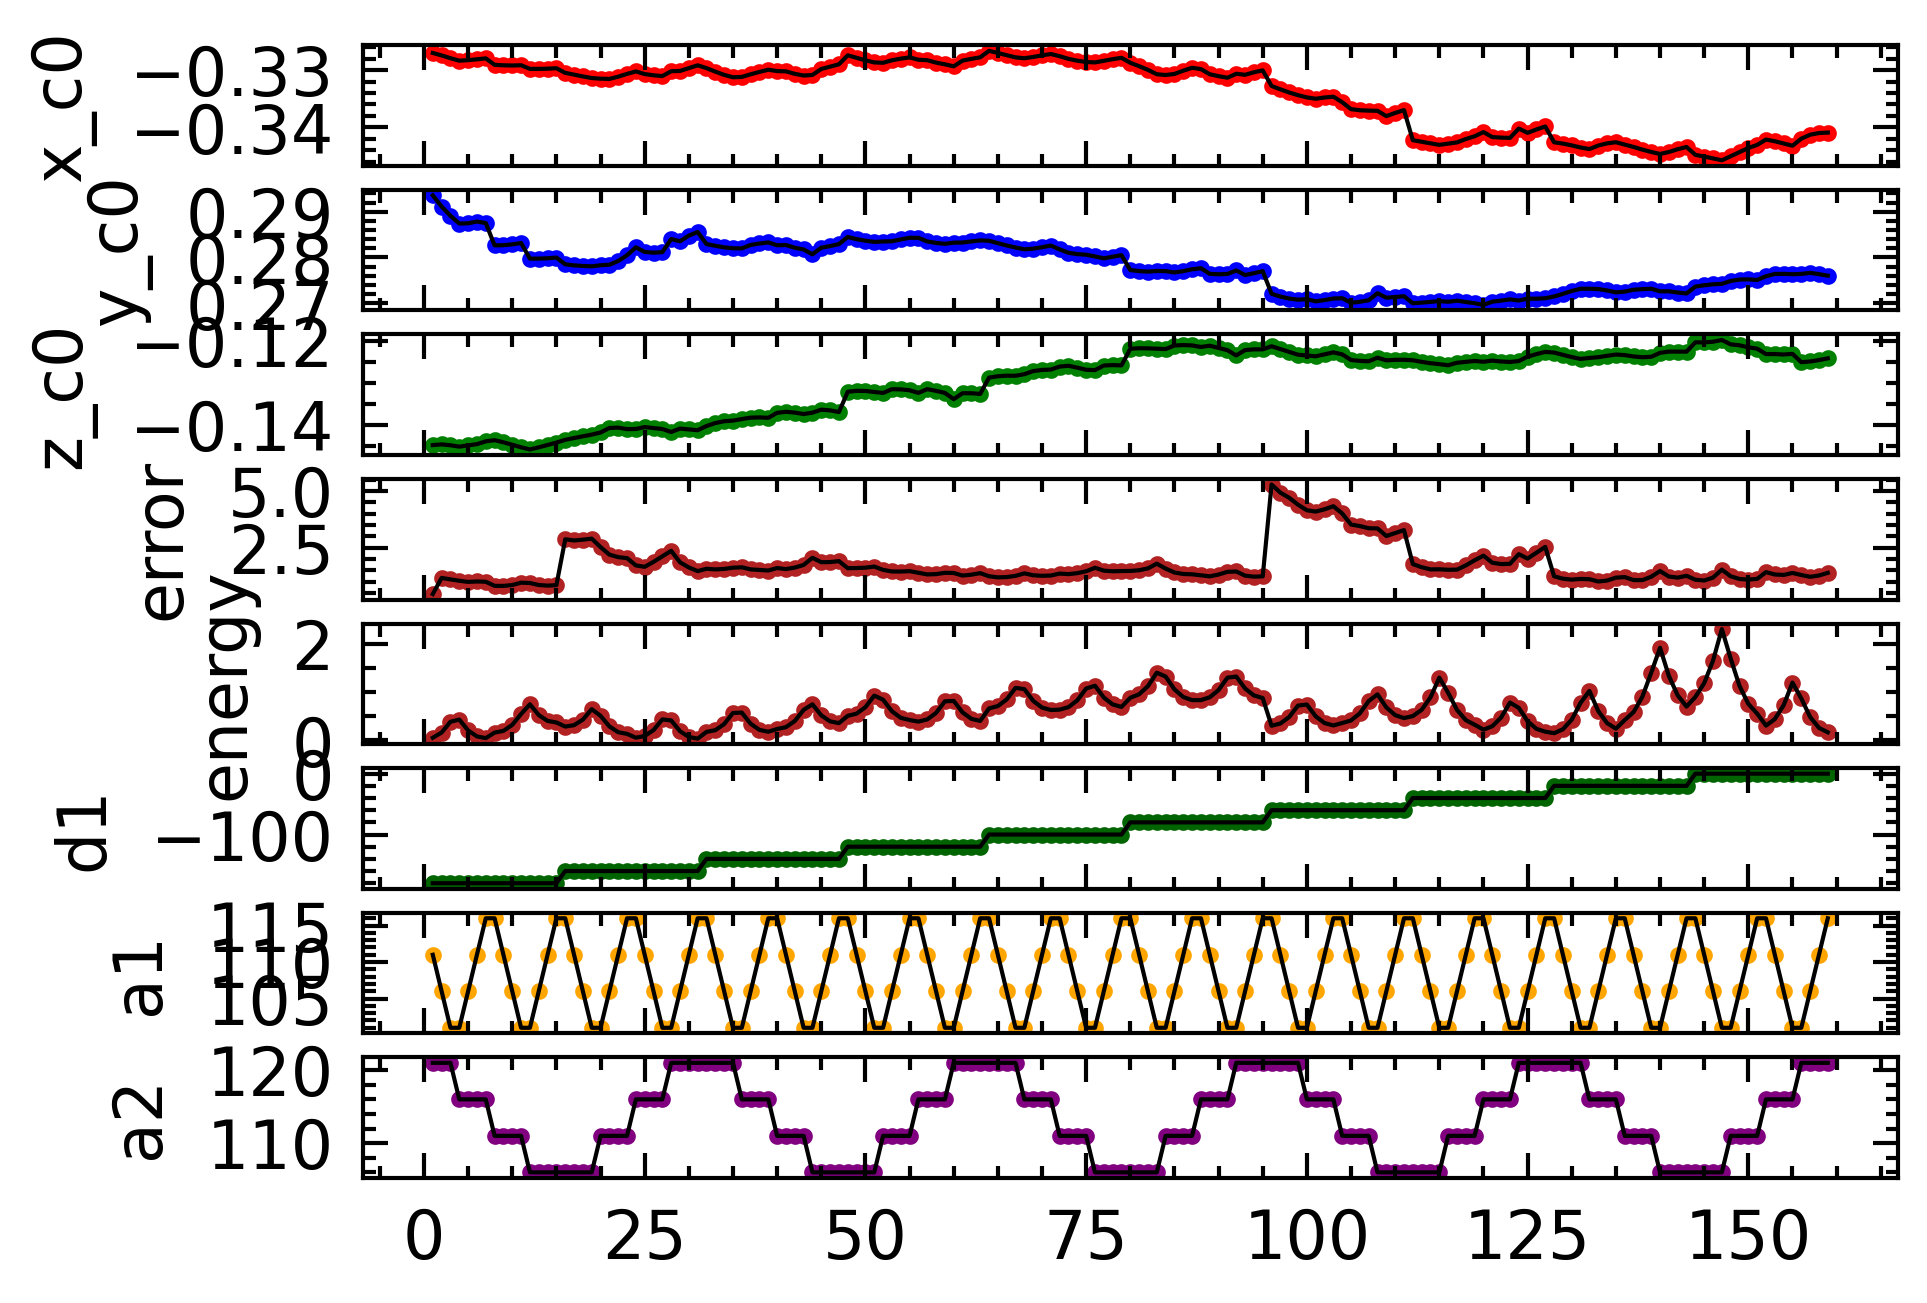

In [4]:
for charge_n in range(1):
    plot_keys = [f"x_c{charge_n}", f"y_c{charge_n}", f"z_c{charge_n}", "error", "energy", "d1", "a1", "a2"]
    plot_colors = ["red", "blue", "green", "firebrick", "firebrick", "darkgreen", "orange", "purple"]

    fig, axes = plt.subplots(len(plot_keys), 1, sharex='col')


    for i, key in enumerate(plot_keys):
        axes[i].plot(avgs["frame"], avgs[key], c="k", linewidth=0.5)
        axes[i].scatter(avgs["frame"], avgs[key], s=1, c=plot_colors[i])
        axes[i].set_ylabel(key)
        plt.savefig("smoothed.pdf", bbox_inches="tight")
#     if i < 3:
#         axes[i].set_ylim(-1.5,1.5)




In [174]:
avgs.sort_values("error")


,frame,x_c0,x_c1,x_c2,x_c3,x_c4,x_c5,x_c6,x_c7,x_c8,...,q_c19,q_c20,q_c21,q_c22,q_c23,a1,a2,d1,error,energy
1,1,-0.327007,-0.230919,-0.163946,-0.123924,-0.072435,-0.102936,-0.077142,-0.213596,0.084067,...,-0.992374,0.05878,0.221421,-0.468575,0.24962,111.0,121.0,-180.0,0.454451,0.052790
9,9,-0.329163,-0.229625,-0.158991,-0.128717,-0.077899,-0.096546,-0.076581,-0.216857,0.080101,...,-0.992374,0.05878,0.221421,-0.468575,0.24962,111.0,111.0,-180.0,0.814169,0.194834
8,8,-0.329084,-0.229686,-0.159201,-0.128544,-0.077725,-0.096736,-0.076542,-0.217208,0.079920,...,-0.992374,0.05878,0.221421,-0.468575,0.24962,116.0,111.0,-180.0,0.817202,0.159187
14,14,-0.329751,-0.229312,-0.157278,-0.130435,-0.080204,-0.093873,-0.076596,-0.217580,0.078518,...,-0.992374,0.05878,0.221421,-0.468575,0.24962,111.0,106.0,-180.0,0.826729,0.401096
15,15,-0.329675,-0.229376,-0.157474,-0.130291,-0.079924,-0.094173,-0.076576,-0.218023,0.078177,...,-0.992374,0.05878,0.221421,-0.468575,0.24962,116.0,106.0,-180.0,0.847430,0.368986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,-0.334644,-0.227598,-0.148322,-0.139957,-0.079029,-0.091277,-0.077229,-0.248046,0.041664,...,-0.992374,0.05878,0.221421,-0.468575,0.24962,116.0,116.0,-60.0,4.331545,0.307761
99,99,-0.334377,-0.227697,-0.148266,-0.140092,-0.079625,-0.090541,-0.077220,-0.248012,0.040628,...,-0.992374,0.05878,0.221421,-0.468575,0.24962,101.0,121.0,-60.0,4.399125,0.718925
98,98,-0.333909,-0.227980,-0.148899,-0.139597,-0.079511,-0.090710,-0.077217,-0.248520,0.039894,...,-0.992374,0.05878,0.221421,-0.468575,0.24962,106.0,121.0,-60.0,4.702445,0.483002
97,97,-0.333359,-0.228323,-0.149595,-0.139021,-0.079310,-0.090988,-0.077223,-0.249034,0.039162,...,-0.992374,0.05878,0.221421,-0.468575,0.24962,111.0,121.0,-60.0,4.929837,0.347762


In [137]:
df1.sort_values("frame")

,Unnamed: 0,frame,energy,local_file,error,a1,a2,d1,x_c0,x_c1,...,q_c17,q_c18,q_c19,q_c20,q_c21,q_c22,q_c23,a1_,a2_,d1_
0,0,0,0.000000,frame_0-0-1.xyz.local,0.407838,116.0,121.0,-180.0,-2.883611,-3.133893,...,0.676163,0.463334,-0.992374,0.05878,0.221421,-0.468575,0.24962,3,3,0
1,1,1,0.052790,frame_1-0-1.xyz.local,0.472529,111.0,121.0,-180.0,-0.326530,-0.231297,...,0.676163,0.463334,-0.992374,0.05878,0.221421,-0.468575,0.24962,2,3,0
5,5,2,0.160819,frame_2-1-2.xyz.local,1.317279,106.0,121.0,-180.0,-0.326625,-0.231240,...,0.676163,0.463334,-0.992374,0.05878,0.221421,-0.468575,0.24962,1,3,0
11,11,3,0.383681,frame_3-2-3.xyz.local,1.338482,101.0,121.0,-180.0,-0.326733,-0.231176,...,0.676163,0.463334,-0.992374,0.05878,0.221421,-0.468575,0.24962,0,3,0
17,17,4,0.428851,frame_4-3-4.xyz.local,1.339507,101.0,116.0,-180.0,-0.326840,-0.231112,...,0.676163,0.463334,-0.992374,0.05878,0.221421,-0.468575,0.24962,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,347,158,0.257420,frame_158-153-158.xyz.local,1.325541,111.0,121.0,0.0,-0.343004,-0.221873,...,0.676163,0.463334,-0.992374,0.05878,0.221421,-0.468575,0.24962,2,3,9
346,346,158,0.257420,frame_158-129-158.xyz.local,1.725162,111.0,121.0,0.0,-0.342470,-0.222121,...,0.676163,0.463334,-0.992374,0.05878,0.221421,-0.468575,0.24962,2,3,9
345,345,159,0.165173,frame_159-158-159.xyz.local,1.314698,116.0,121.0,0.0,-0.342296,-0.222405,...,0.676163,0.463334,-0.992374,0.05878,0.221421,-0.468575,0.24962,3,3,9
343,343,159,0.165173,frame_159-128-159.xyz.local,1.818259,116.0,121.0,0.0,-0.342422,-0.222148,...,0.676163,0.463334,-0.992374,0.05878,0.221421,-0.468575,0.24962,3,3,9
